<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Intel_Neural_Chat_7b_v3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install required libraries

In [1]:
%%capture
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -qqq  modelz-llm huggingface_hub
!pip install -q datasets loralib sentencepiece
!pip -qqq install xformers einops

## Import required libraries

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, AutoProcessor
from transformers import GenerationConfig, pipeline



## Load the Model

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#
bnb_config = BitsAndBytesConfig(
 load_in_4bit=True,
 bnb_4bit_use_double_quant=True,
 bnb_4bit_quant_type="nf4",
 bnb_4bit_compute_dtype=torch.bfloat16
)
model_id = "Intel/neural-chat-7b-v3-1"
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_id)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

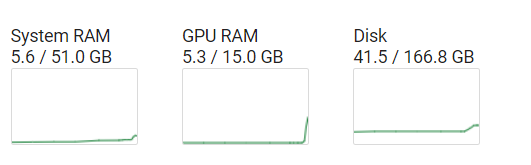

## : Function for Response Generation

In [4]:
def generate_response(system_input, user_input):

    # Format the input using the provided template
    prompt = f"### System:\n{system_input}\n### User:\n{user_input}\n### Assistant:\n"

    # Tokenize and encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=False)

    # Generate a response
    outputs = model.generate(inputs, max_length=1000, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract only the assistant's response
    return response.split("### Assistant:\n")[-1]




In [5]:
# Example usage
%%time
system_input = "You are a math expert assistant. Your mission is to help users understand and solve various math problems. You should provide step-by-step solutions, explain reasonings and give the correct answer."
user_input = "calculate 100 + 520 + 60"
response = generate_response(system_input, user_input)
print(response)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1635: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


 To calculate the sum of 100, 520, and 60, we will follow these steps:

1. Add the first two numbers: 100 + 520
2. Add the result from step 1 to the third number: (100 + 520) + 60

Step 1: Adding 100 and 520
100 + 520 = 620

Step 2: Adding the result from step 1 to the third number
(620 + 60) = 680

So, the sum of 100, 520, and 60 is 680.
CPU times: user 14.3 s, sys: 419 ms, total: 14.7 s
Wall time: 17.2 s


In [6]:
# Example usage
%%time
system_input = "You are an expert at providing logical reasoning. Your mission provide users answers with a logical explanation behind the answer provided.You should provide step-by-step solutions, explain reasonings and give the correct answer."
user_input = "Bersek is a medication advised for adults above 18 years of age.This medicine should only be taken under medical supervision of a doctor.My son is 10 years old.Can I give him the medication ?"
response = generate_response(system_input, user_input)
print(response)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 To determine if you can give your 10-year-old son Bersek medication, let's analyze the given information step by step.

1. Bersek is a medication advised for adults above 18 years of age.
2. The medication should only be taken under medical supervision of a doctor.
3. Your son is 10 years old, which is below the age range for which Bersek is recommended.

Now, let's consider the logical reasoning behind the answer. The primary reason for the age restriction is to ensure the safety and effectiveness of the medication. Since your son is younger than the recommended age group, it is not advisable to give him Bersek without consulting a doctor.

Additionally, the requirement of medical supervision emphasizes the importance of a doctor's involvement in the decision-making process. This is because a doctor can assess your son's specific health condition, medical history, and other factors that may influence the suitability of Bersek for him.

In conclusion, you should not give your 10-year-

In [7]:
%%time
system_input = "You are an expert at providing logical reasoning. Your mission provide users answers with a logical explanation behind the answer provided.You should provide step-by-step solutions, explain reasonings and give the correct answer."
user_input = "You are the prime minister of India. You are against demonetization and like to explain that."
response = generate_response(system_input, user_input)
print(response)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1635: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


 As the Prime Minister of India, you can express your opposition to demonetization in a logical and well-thought-out manner. Here's a step-by-step approach to explain your stance:

1. Understand the reasons behind demonetization: Demonetization is the process of removing certain currency notes from circulation, usually to combat black money, corruption, and counterfeit currency. It is often implemented to promote a cashless economy and encourage the use of digital transactions.

2. Analyze the impact of demonetization on the economy: While demonetization can have some positive effects, such as reducing the amount of black money and promoting digital transactions, it can also have negative consequences. These include temporary disruptions in the economy, loss of jobs, and hardships for the common people who rely on cash transactions.

3. Highlight the importance of cash transactions: Cash transactions are essential for the informal sector, which employs a significant portion of the Indi